In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv('C:/Users/ADMIN/Downloads/training_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [146]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [147]:
df.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
MSZoning,5,RL,1151
Street,2,Pave,1454
Alley,2,Grvl,50
LotShape,4,Reg,925
LandContour,4,Lvl,1311
Utilities,2,AllPub,1459
LotConfig,5,Inside,1052
LandSlope,3,Gtl,1382
Neighborhood,25,NAmes,225
Condition1,9,Norm,1260


In [148]:
# Getting the number of missing values in each column
num_missing = df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [149]:
df['PoolArea'].value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [150]:
df["PoolQC"].fillna("no pool",inplace = True)

In [151]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [152]:
df["MiscFeature"].fillna("No feature",inplace = True)

# Alley, Fence, FireplaceQu, Lot Frontage

In [153]:
df["Alley"].fillna("No Alley",inplace = True)
df["Fence"].fillna("No Fence",inplace = True)
df["FireplaceQu"].fillna("No Fireplace",inplace = True)
df["LotFrontage"].fillna("0",inplace = True)

# Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1

In [154]:
bsmt_columns = [col for col in df.columns if "Bsmt" in col]
df[df['BsmtHalfBath'].isna()][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath


In [155]:
df[~pd.isna(df['BsmtCond']) & 
        pd.isna(df['BsmtExposure'])][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


In [156]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF", 
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"]:
    df[col].fillna(0, inplace=True)

df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtExposure']), "BsmtExposure"] = "No"
df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtFinType2']), "BsmtFinType2"] = "Unf"

for col in ["BsmtExposure", "BsmtFinType2", 
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    df[col].fillna("No Basement", inplace=True)

# MasVnrArea, MasVnrType

In [157]:
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

# Electrical

In [158]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

# MSZoning, Sale Type, Functional, Utilities, Kitchen Qual, Exterior1st, Exterior2nd

In [159]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   object 
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [161]:
garage_columns = [col for col in df.columns if col.startswith("Garage")]
df[df['GarageCars'].isna()][garage_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


In [162]:
df[~pd.isna(df['GarageType']) & 
        pd.isna(df['GarageQual'])][garage_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


In [163]:
df['GarageCars'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

df.loc[~pd.isna(df['GarageType']) & 
            pd.isna(df['GarageQual']), "GarageType"] = "No Garage"

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)
    
df['GarageYrBlt'].fillna(0, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   object 
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [165]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [166]:
df.shape

(1460, 81)

In [167]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

In [168]:
df['LotFrontage'] = df['LotFrontage'].astype(float)

In [169]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [170]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [171]:
len(cat)

43

In [172]:
len(con)

38

In [173]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [174]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [175]:
df[cat]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
1,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
2,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
3,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,no pool,No Fence,No feature,WD,Abnorml
4,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
1456,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,no pool,MnPrv,No feature,WD,Normal
1457,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,no pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,no pool,No Fence,No feature,WD,Normal


In [176]:
df[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [177]:
from scipy.stats import zscore

In [178]:
zscore(df['LotFrontage'])

0       0.212877
1       0.645747
2       0.299451
3       0.068587
4       0.761179
          ...   
1455    0.126303
1456    0.790037
1457    0.241735
1458    0.299451
1459    0.501457
Name: LotFrontage, Length: 1460, dtype: float64

In [179]:
np.where(np.abs(zscore(df['LotFrontage'])>3))[0].tolist()

[197, 231, 934, 1107, 1127, 1298]

In [180]:
list(np.where(np.abs(zscore(df['LotFrontage'])>3))[0])

[197, 231, 934, 1107, 1127, 1298]

In [181]:
out = []
for i in con:
    out = out + list(df[(zscore(df[i])>3)|(zscore(df[i])<-3)].index)
    out

In [182]:
p1 = [10,20,30]
p2 = [40,50]
p1+p2

[10, 20, 30, 40, 50]

In [183]:
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 197,
 231,
 934,
 1107,
 1127,
 1298,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 828,
 842,
 854,
 888,
 918,
 923,
 924,
 1040,
 1059,
 1077,
 115

In [184]:
outliers = np.unique(out)
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   89,   93,   99,  102,
        104,  105,  108,  113,  115,  116,  118,  120,  125,  127,  129,
        137,  140,  144,  148,  153,  154,  155,  159,  161,  163,  165,
        166,  169,  170,  176,  178,  182,  185,  187,  188,  189,  191,
        196,  197,  198,  201,  205,  210,  213,  215,  218,  224,  231,
        233,  237,  241,  245,  246,  249,  250,  251,  253,  258,  260,
        263,  267,  271,  273,  278,  280,  287,  289,  291,  293,  297,
        298,  299,  300,  304,  306,  307,  309,  312,  313,  314,  322,
        325,  326,  328,  330,  332,  335,  339,  342,  343,  346,  349,
        351,  352,  355,  357,  358,  359,  360,  365,  366,  367,  375,
        378,  380,  384,  386,  389,  393,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  431,  434,  440,  4

In [185]:
len(outliers)

487

In [186]:
df.drop(outliers,axis=0,inplace=True)

In [187]:
df[0:60]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,2,2008,WD,Normal,129500
11,12,60,RL,85.0,11924,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,7,2006,New,Partial,345000
12,13,20,RL,0.0,12968,Pave,No Alley,IR2,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,9,2008,WD,Normal,144000
13,14,20,RL,91.0,10652,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,8,2007,New,Partial,279500
14,15,20,RL,0.0,10920,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,GdWo,No feature,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,GdPrv,No feature,0,7,2007,WD,Normal,132000


In [188]:
df.shape

(973, 81)

In [189]:
df.index = range(0,973,1)

In [190]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,2,2008,WD,Normal,208500
1,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,9,2008,WD,Normal,223500
2,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,12,2008,WD,Normal,250000
3,7,20,RL,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,8,2007,WD,Normal,307000
4,11,20,RL,70.0,11200,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1452,20,RL,78.0,9262,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,5,2009,New,Partial,287090
969,1453,180,RM,35.0,3675,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,5,2006,WD,Normal,145000
970,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,10,2009,WD,Normal,185000
971,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,...,0,no pool,No Fence,No feature,0,8,2007,WD,Normal,175000


# EDA

In [191]:
df.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.200852
OverallCond     -0.167985
BsmtFinSF2      -0.100767
MiscVal         -0.079800
MSSubClass      -0.037060
YrSold          -0.032323
Id              -0.025411
LowQualFinSF    -0.025369
3SsnPorch       -0.003267
ScreenPorch      0.005983
MoSold           0.087820
BsmtUnfSF        0.214961
BsmtFullBath     0.233450
LotFrontage      0.243136
HalfBath         0.248401
BedroomAbvGr     0.266639
2ndFlrSF         0.304785
WoodDeckSF       0.319391
BsmtFinSF1       0.337396
LotArea          0.344339
OpenPorchSF      0.395093
MasVnrArea       0.403162
Fireplaces       0.426653
YearRemodAdd     0.564039
GarageYrBlt      0.572667
1stFlrSF         0.578824
TotRmsAbvGrd     0.585350
TotalBsmtSF      0.614753
YearBuilt        0.622137
GarageArea       0.648649
FullBath         0.652378
GarageCars       0.684766
GrLivArea        0.746820
OverallQual      0.806306
SalePrice        1.000000
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePr

In [192]:
A = pd.DataFrame(df.corr()['SalePrice'].sort_values())
imp_con_columns = A[(A['SalePrice']>0.1)|(A['SalePrice']<-0.1)].index.tolist()
imp_con_columns.remove('SalePrice')

In [193]:
imp_con_columns

['EnclosedPorch',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotFrontage',
 'HalfBath',
 'BedroomAbvGr',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'LotArea',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'YearRemodAdd',
 'GarageYrBlt',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [194]:
len(cat)

43

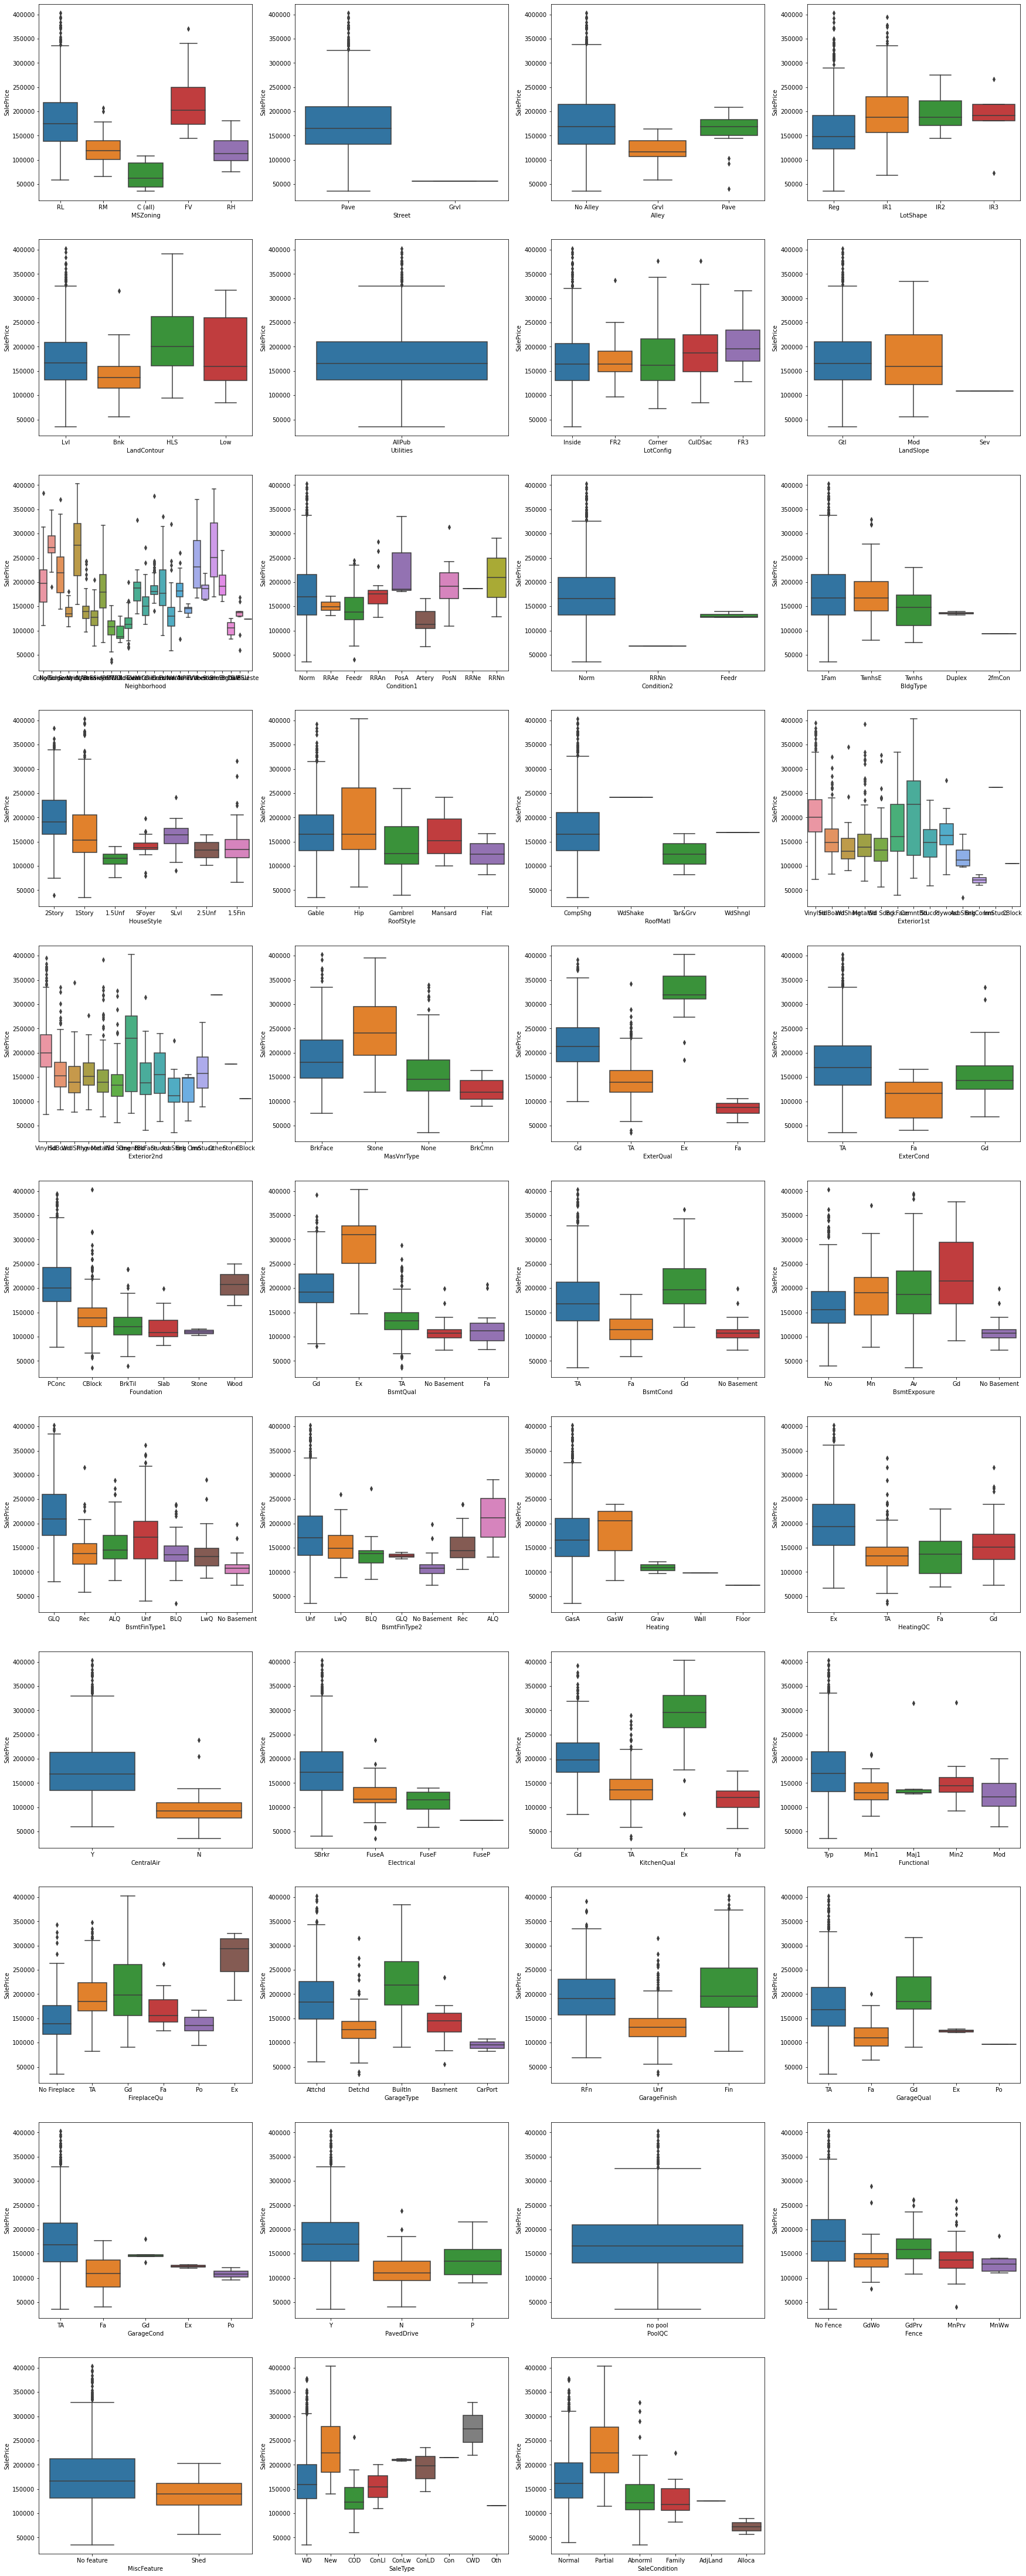

In [195]:
plt.figure(figsize=(30,80))
x = 1
for i in cat:
    plt.subplot(11,4,x)    
    sns.boxplot(df[i],df['SalePrice'])
    x = x+1

In [196]:
X = df.drop(['SalePrice','Id'],axis=1)
Y = df['SalePrice']

In [197]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,2,2008,WD,Normal
1,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,9,2008,WD,Normal
2,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,no pool,No Fence,No feature,0,12,2008,WD,Normal
3,20,RL,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,8,2007,WD,Normal
4,20,RL,70.0,11200,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,20,RL,78.0,9262,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,5,2009,New,Partial
969,180,RM,35.0,3675,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,5,2006,WD,Normal
970,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,10,2009,WD,Normal
971,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,No Fence,No feature,0,8,2007,WD,Normal


In [198]:
Y

0      208500
1      223500
2      250000
3      307000
4      129500
        ...  
968    287090
969    145000
970    185000
971    175000
972    210000
Name: SalePrice, Length: 973, dtype: int64

In [199]:
X[imp_con_columns]

,EnclosedPorch,OverallCond,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,LotFrontage,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,...,GarageYrBlt,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,GarageArea,FullBath,GarageCars,GrLivArea,OverallQual
0,0,5,0,150,1,65.0,1,3,854,0,...,2003.0,856,8,856,2003,548,2,2,1710,7
1,0,5,0,434,1,68.0,1,3,866,0,...,2001.0,920,6,920,2001,608,2,2,1786,7
2,0,5,0,490,1,84.0,1,4,1053,192,...,2000.0,1145,9,1145,2000,836,2,3,2198,8
3,0,5,0,317,1,75.0,0,3,0,255,...,2004.0,1694,7,1686,2004,636,2,2,1694,8
4,0,5,0,134,1,70.0,0,3,0,0,...,1965.0,1040,5,1040,1965,384,1,1,1040,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,5,0,1573,0,78.0,0,3,0,0,...,2008.0,1578,7,1573,2008,840,2,3,1578,8
969,0,5,0,0,1,35.0,0,2,0,0,...,2005.0,1072,5,547,2005,525,1,2,1072,5
970,0,5,0,811,1,62.0,0,2,0,0,...,2004.0,1221,6,1221,2004,400,2,2,1221,7
971,0,5,0,953,0,62.0,1,3,694,0,...,1999.0,953,7,953,1999,460,2,2,1647,6


In [200]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(X[imp_con_columns])
X1 = pd.DataFrame(array,columns=imp_con_columns)
X1

,EnclosedPorch,OverallCond,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,LotFrontage,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,...,GarageYrBlt,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,GarageArea,FullBath,GarageCars,GrLivArea,OverallQual
0,0.0,0.4,0.000000,0.080257,1.0,0.427632,1.0,0.50,0.598458,0.000000,...,0.93,0.236292,0.625,0.396664,0.951613,0.434490,0.666667,0.333333,0.500787,0.625
1,0.0,0.4,0.000000,0.232210,1.0,0.447368,1.0,0.50,0.606868,0.000000,...,0.91,0.272470,0.375,0.426321,0.935484,0.501680,0.666667,0.333333,0.530709,0.625
2,0.0,0.4,0.000000,0.262172,1.0,0.552632,1.0,0.75,0.737912,0.410256,...,0.90,0.399661,0.750,0.530584,0.927419,0.756999,0.666667,0.666667,0.692913,0.750
3,0.0,0.4,0.000000,0.169609,1.0,0.493421,0.0,0.50,0.000000,0.544872,...,0.94,0.710006,0.500,0.781279,0.959677,0.533035,0.666667,0.333333,0.494488,0.750
4,0.0,0.4,0.000000,0.071696,1.0,0.460526,0.0,0.50,0.000000,0.000000,...,0.55,0.340305,0.250,0.481928,0.645161,0.250840,0.333333,0.000000,0.237008,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,0.4,0.000000,0.841627,0.0,0.513158,0.0,0.50,0.000000,0.000000,...,0.98,0.644432,0.500,0.728916,0.991935,0.761478,0.666667,0.666667,0.448819,0.750
969,0.0,0.4,0.000000,0.000000,1.0,0.230263,0.0,0.25,0.000000,0.000000,...,0.95,0.358395,0.250,0.253475,0.967742,0.408735,0.333333,0.333333,0.249606,0.375
970,0.0,0.4,0.000000,0.433922,1.0,0.407895,0.0,0.25,0.000000,0.000000,...,0.94,0.442623,0.375,0.565802,0.959677,0.268757,0.666667,0.333333,0.308268,0.625
971,0.0,0.4,0.000000,0.509898,0.0,0.407895,1.0,0.50,0.486335,0.000000,...,0.89,0.291125,0.500,0.441613,0.919355,0.335946,0.666667,0.333333,0.475984,0.500


In [201]:
X2 = pd.get_dummies(X[cat])
X2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
969,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
970,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
971,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [202]:
Xnew = X1.join(X2)
Xnew

,EnclosedPorch,OverallCond,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,LotFrontage,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.4,0.000000,0.080257,1.0,0.427632,1.0,0.50,0.598458,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.4,0.000000,0.232210,1.0,0.447368,1.0,0.50,0.606868,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.4,0.000000,0.262172,1.0,0.552632,1.0,0.75,0.737912,0.410256,...,0,0,0,1,0,0,0,0,1,0
3,0.0,0.4,0.000000,0.169609,1.0,0.493421,0.0,0.50,0.000000,0.544872,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0.4,0.000000,0.071696,1.0,0.460526,0.0,0.50,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,0.4,0.000000,0.841627,0.0,0.513158,0.0,0.50,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
969,0.0,0.4,0.000000,0.000000,1.0,0.230263,0.0,0.25,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
970,0.0,0.4,0.000000,0.433922,1.0,0.407895,0.0,0.25,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
971,0.0,0.4,0.000000,0.509898,0.0,0.407895,1.0,0.50,0.486335,0.000000,...,0,0,0,1,0,0,0,0,1,0


# Splitting the dataset

In [203]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.25,random_state=21)

In [204]:
xtrain.shape

(729, 258)

In [205]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [206]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 14870155656265.746
Mean_squared_error: 7.793046597491878e+27
R_squared: -1.893716282682856e+18
Adj_R2: 3.0678203779462267e+19


In [207]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9836.108367626886
Mean_squared_error: 187501400.39643347
R_squared: 0.9508442721732749
Adj_R2: 0.9238609151960514


# Ridge Regression

In [208]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

Ridge()

In [209]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 12976.591434192542
Mean_squared_error: 353878307.77705115
R_squared: 0.9140073005926416
Adj_R2: 2.3930817303992065


In [210]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9993.345707342747
Mean_squared_error: 195407498.4283781
R_squared: 0.9487715943041604
Adj_R2: 0.9206504694753803


# Lasso Regression

In [211]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [212]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 13536.222382558148
Mean_squared_error: 391577272.0561706
R_squared: 0.9048464234436938
Adj_R2: 2.54148794021216


In [213]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9844.837569699586
Mean_squared_error: 187623105.3583319
R_squared: 0.9508123657663382
Adj_R2: 0.9238114942082856


# With Hyperparameter Tuning

## Ridge with GridSearchCV

In [214]:
ridge_model = Ridge()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv = 5)

gscv_ridge_model.fit(xtrain,ytrain)

gscv_ridge_model.best_estimator_

Ridge(alpha=0.9899999999999995)

In [215]:
ridge_model = Ridge(alpha=0.9899999999999995)  
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.9899999999999995)

In [216]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 12979.73010575138
Mean_squared_error: 354031474.83309984
R_squared: 0.9139700808808919
Adj_R2: 2.3936846897295507


In [217]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9991.399198075438
Mean_squared_error: 195316309.31474173
R_squared: 0.9487955006176129
Adj_R2: 0.9206874988289833


## Lasso with  GridSearchCV

In [218]:
lasso_model = Lasso()

hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv = 5)

gscv_lasso_model.fit(xtrain,ytrain)

gscv_lasso_model.best_estimator_

Lasso(alpha=0.9899999999999995)

In [219]:
lasso_model = Lasso(alpha=0.9899999999999995)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [220]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)
# ypredtest

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 13537.341752987699
Mean_squared_error: 391632337.3827452
R_squared: 0.9048330425272267
Adj_R2: 2.5417047110589266


In [221]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9844.741019447558
Mean_squared_error: 187621625.3357628
R_squared: 0.9508127537719021
Adj_R2: 0.9238120952041378


# Final Model

In [222]:
ridge_model = Ridge()
ridge_model.fit(Xnew,Y)

Ridge()

In [223]:
df1 = pd.read_csv('C:/Users/ADMIN/Downloads/testing_set.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [225]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [226]:
df1['PoolArea'].value_counts()

0      1453
144       1
228       1
368       1
444       1
561       1
800       1
Name: PoolArea, dtype: int64

In [227]:
df1["PoolQC"].fillna("no pool",inplace = True)

In [228]:
df1["MiscFeature"].fillna("no feature",inplace = True)
df1["Alley"].fillna("no alley",inplace = True)
df1["Fence"].fillna("no fence",inplace = True)
df1["LotFrontage"].fillna("0",inplace = True)
df1["FireplaceQu"].fillna("no fireplace",inplace = True)
df1["MasVnrArea"].fillna("0",inplace = True)
df1["MasVnrType"].fillna("none",inplace = True)

In [229]:
df1['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df1['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)
df1['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df1['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
df1['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df1['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df1['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)

In [230]:
bsmt_columns = [col for col in df1.columns if "Bsmt" in col]
df1[df1['BsmtHalfBath'].isna()][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [231]:
df1[~pd.isna(df1['BsmtCond']) & 
        pd.isna(df1['BsmtExposure'])][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [232]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF", 
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"]:
    df1[col].fillna(0, inplace=True)

df1.loc[~pd.isna(df1['BsmtCond']) & 
            pd.isna(df1['BsmtExposure']), "BsmtExposure"] = "No"
df1.loc[~pd.isna(df1['BsmtCond']) & 
            pd.isna(df1['BsmtFinType2']), "BsmtFinType2"] = "Unf"

for col in ["BsmtExposure", "BsmtFinType2", 
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    df1[col].fillna("No Basement", inplace=True)

In [233]:
garage_columns = [col for col in df1.columns if col.startswith("Garage")]
df1[df1['GarageCars'].isna()][garage_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
df1[~pd.isna(df1['GarageType']) & 
        pd.isna(df1['GarageQual'])][garage_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
df1['GarageCars'].fillna(0, inplace=True)
df1['GarageArea'].fillna(0, inplace=True)

df1.loc[~pd.isna(df1['GarageType']) & 
            pd.isna(df1['GarageQual']), "GarageType"] = "No Garage"

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df1[col].fillna('No Garage', inplace=True)
    
df1['GarageYrBlt'].fillna(0, inplace=True)

In [236]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   object 
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [237]:
df1.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 80, dtype: object

In [238]:
df1['LotFrontage'] = df1['LotFrontage'].astype(float)
df1['MasVnrArea'] = df1['MasVnrArea'].astype(float)

In [239]:
cat = []
con = []
for i in df1.columns:
    if df1[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [240]:
df[cat]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
1,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
2,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
3,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
4,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Detchd,Unf,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,Fin,TA,TA,Y,no pool,No Fence,No feature,New,Partial
969,RM,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Basment,Fin,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
970,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal
971,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,no pool,No Fence,No feature,WD,Normal


In [241]:
df[con]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
2,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
3,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
4,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,384,0,0,0,0,0,0,0,2,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,840,0,36,0,0,0,0,0,5,2009
969,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,525,0,28,0,0,0,0,0,5,2006
970,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,400,0,113,0,0,0,0,0,10,2009
971,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007


In [242]:
from scipy.stats import zscore

In [243]:
out = []
for i in con:
    out = out + list(df1[(zscore(df1[i])>3)|(zscore(df1[i])<-3)].index)
    out

In [244]:
out

[65,
 79,
 96,
 99,
 350,
 374,
 377,
 559,
 630,
 634,
 640,
 643,
 675,
 683,
 686,
 731,
 804,
 1012,
 1015,
 1016,
 1021,
 1106,
 1119,
 1258,
 1266,
 1293,
 1311,
 1318,
 1323,
 1414,
 1432,
 799,
 804,
 1053,
 1139,
 1456,
 396,
 485,
 487,
 728,
 748,
 790,
 803,
 804,
 1089,
 1107,
 1139,
 1147,
 1150,
 1157,
 1336,
 1440,
 1444,
 756,
 1444,
 76,
 77,
 78,
 98,
 134,
 159,
 283,
 326,
 333,
 371,
 378,
 387,
 451,
 485,
 580,
 636,
 639,
 644,
 645,
 653,
 741,
 747,
 786,
 790,
 953,
 966,
 986,
 1010,
 1013,
 1121,
 396,
 991,
 19,
 40,
 70,
 200,
 211,
 217,
 238,
 313,
 514,
 516,
 520,
 531,
 535,
 579,
 762,
 776,
 803,
 806,
 834,
 879,
 1089,
 1112,
 1130,
 1135,
 1157,
 1168,
 1170,
 1201,
 1220,
 1222,
 1251,
 1281,
 169,
 203,
 211,
 217,
 245,
 514,
 701,
 832,
 1089,
 1229,
 32,
 33,
 72,
 108,
 120,
 158,
 194,
 238,
 259,
 267,
 270,
 275,
 312,
 443,
 444,
 463,
 500,
 540,
 557,
 562,
 577,
 578,
 682,
 704,
 712,
 738,
 815,
 818,
 914,
 916,
 956,
 957,
 101

In [245]:
outliers = np.unique(out)
outliers

array([   1,    6,   19,   26,   29,   32,   33,   40,   42,   47,   48,
         51,   53,   57,   63,   65,   66,   69,   70,   71,   72,   75,
         76,   77,   78,   79,   85,   91,   92,   93,   95,   96,   98,
         99,  100,  105,  108,  110,  114,  115,  120,  130,  133,  134,
        136,  141,  142,  143,  145,  146,  153,  154,  155,  158,  159,
        161,  162,  163,  169,  176,  184,  194,  196,  198,  199,  200,
        203,  206,  211,  217,  238,  245,  257,  259,  261,  267,  269,
        270,  271,  275,  276,  277,  278,  283,  288,  290,  291,  293,
        294,  295,  301,  304,  305,  306,  310,  311,  312,  313,  315,
        322,  325,  326,  327,  330,  331,  333,  336,  341,  346,  348,
        350,  351,  359,  360,  361,  362,  367,  368,  371,  374,  376,
        377,  378,  379,  380,  383,  384,  385,  386,  387,  396,  397,
        398,  399,  400,  401,  402,  403,  404,  420,  427,  433,  439,
        441,  442,  443,  444,  451,  452,  454,  4

In [246]:
len(outliers)

468

In [247]:
df1.drop(outliers,axis=0,inplace=True)

In [248]:
df1[0:60]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,no alley,Reg,Lvl,AllPub,...,120,0,no pool,MnPrv,no feature,0,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,MnPrv,no feature,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,no alley,IR1,HLS,AllPub,...,144,0,no pool,no fence,no feature,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,4,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,MnPrv,no feature,0,4,2010,WD,Normal
10,1471,120,RH,26.0,5858,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,6,2010,WD,Normal
11,1472,160,RM,21.0,1680,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,2,2010,COD,Normal


In [249]:
df1.shape

(991, 80)

In [250]:
df1.index = range(0,991,1)

In [251]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,no alley,Reg,Lvl,AllPub,...,120,0,no pool,MnPrv,no feature,0,6,2010,WD,Normal
1,1463,60,RL,74.0,13830,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,MnPrv,no feature,0,3,2010,WD,Normal
2,1464,60,RL,78.0,9978,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,6,2010,WD,Normal
3,1465,120,RL,43.0,5005,Pave,no alley,IR1,HLS,AllPub,...,144,0,no pool,no fence,no feature,0,1,2010,WD,Normal
4,1466,60,RL,75.0,10000,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2911,160,RM,21.0,1484,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,5,2006,WD,Normal
987,2912,20,RL,80.0,13384,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,5,2006,WD,Normal
988,2913,160,RM,21.0,1533,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,12,2006,WD,Abnorml
989,2916,160,RM,21.0,1894,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,no feature,0,4,2006,WD,Abnorml


In [252]:
imp_con_columns

['EnclosedPorch',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'LotFrontage',
 'HalfBath',
 'BedroomAbvGr',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'LotArea',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'YearRemodAdd',
 'GarageYrBlt',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [253]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(X[imp_con_columns])
M1 = pd.DataFrame(array,columns=imp_con_columns)
M1

,EnclosedPorch,OverallCond,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,LotFrontage,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,...,GarageYrBlt,1stFlrSF,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,GarageArea,FullBath,GarageCars,GrLivArea,OverallQual
0,0.0,0.4,0.000000,0.080257,1.0,0.427632,1.0,0.50,0.598458,0.000000,...,0.93,0.236292,0.625,0.396664,0.951613,0.434490,0.666667,0.333333,0.500787,0.625
1,0.0,0.4,0.000000,0.232210,1.0,0.447368,1.0,0.50,0.606868,0.000000,...,0.91,0.272470,0.375,0.426321,0.935484,0.501680,0.666667,0.333333,0.530709,0.625
2,0.0,0.4,0.000000,0.262172,1.0,0.552632,1.0,0.75,0.737912,0.410256,...,0.90,0.399661,0.750,0.530584,0.927419,0.756999,0.666667,0.666667,0.692913,0.750
3,0.0,0.4,0.000000,0.169609,1.0,0.493421,0.0,0.50,0.000000,0.544872,...,0.94,0.710006,0.500,0.781279,0.959677,0.533035,0.666667,0.333333,0.494488,0.750
4,0.0,0.4,0.000000,0.071696,1.0,0.460526,0.0,0.50,0.000000,0.000000,...,0.55,0.340305,0.250,0.481928,0.645161,0.250840,0.333333,0.000000,0.237008,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,0.4,0.000000,0.841627,0.0,0.513158,0.0,0.50,0.000000,0.000000,...,0.98,0.644432,0.500,0.728916,0.991935,0.761478,0.666667,0.666667,0.448819,0.750
969,0.0,0.4,0.000000,0.000000,1.0,0.230263,0.0,0.25,0.000000,0.000000,...,0.95,0.358395,0.250,0.253475,0.967742,0.408735,0.333333,0.333333,0.249606,0.375
970,0.0,0.4,0.000000,0.433922,1.0,0.407895,0.0,0.25,0.000000,0.000000,...,0.94,0.442623,0.375,0.565802,0.959677,0.268757,0.666667,0.333333,0.308268,0.625
971,0.0,0.4,0.000000,0.509898,0.0,0.407895,1.0,0.50,0.486335,0.000000,...,0.89,0.291125,0.500,0.441613,0.919355,0.335946,0.666667,0.333333,0.475984,0.500


In [254]:
M2 = pd.get_dummies(X[cat])
M2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
969,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
970,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
971,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [255]:
Mnew = M1.join(M2)
Mnew

,EnclosedPorch,OverallCond,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,LotFrontage,HalfBath,BedroomAbvGr,2ndFlrSF,WoodDeckSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.4,0.000000,0.080257,1.0,0.427632,1.0,0.50,0.598458,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.4,0.000000,0.232210,1.0,0.447368,1.0,0.50,0.606868,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.4,0.000000,0.262172,1.0,0.552632,1.0,0.75,0.737912,0.410256,...,0,0,0,1,0,0,0,0,1,0
3,0.0,0.4,0.000000,0.169609,1.0,0.493421,0.0,0.50,0.000000,0.544872,...,0,0,0,1,0,0,0,0,1,0
4,0.0,0.4,0.000000,0.071696,1.0,0.460526,0.0,0.50,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,0.4,0.000000,0.841627,0.0,0.513158,0.0,0.50,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
969,0.0,0.4,0.000000,0.000000,1.0,0.230263,0.0,0.25,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
970,0.0,0.4,0.000000,0.433922,1.0,0.407895,0.0,0.25,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
971,0.0,0.4,0.000000,0.509898,0.0,0.407895,1.0,0.50,0.486335,0.000000,...,0,0,0,1,0,0,0,0,1,0


# Ridge Model

In [256]:
ridge_model = Ridge()
ridge_model.fit(Mnew,Y)

Ridge()

In [257]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtest) -1) / (len(xtest)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 9785.057252984014
Mean_squared_error: 224586886.68439972
R_squared: 0.9454252147897875
Adj_R2: 1.884111520405443


In [258]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print('R_squared:',R_squared)

Adj_R2 = 1- ((1-R_squared)*(len(xtrain) -1) / (len(xtrain)-len(Xnew.columns)-1))
print('Adj_R2:',Adj_R2)

Mean_absolute_error: 10210.77451865754
Mean_squared_error: 207820893.90325224
R_squared: 0.9455172746666627
Adj_R2: 0.9156097360794264


In [259]:
ypredtest

array([147324.6770029 , 194043.84605005, 245130.7274918 , 210959.98712399,
       125873.89989039, 228075.21260867, 133806.97386134, 150606.93314486,
        84973.50410486, 306450.34175631,  74225.19275542, 156563.89754439,
       152722.80212949, 186917.02286917, 139155.88858586, 141839.1738528 ,
       234669.16369663, 153135.12767086, 141883.89751945, 148048.58285454,
        43062.56042288, 111969.6920487 , 141968.08926523, 191537.04761242,
       250650.17171339, 173709.50068222, 164701.76446602, 184877.5728522 ,
       129464.67531359, 181961.93176885, 157872.49165249, 127966.2019116 ,
       146955.51862954, 245468.50486538, 100732.81127928, 228316.56479287,
       189569.06361563, 176701.31529593, 214010.47584765, 229703.78553159,
       330023.70554267, 160599.44155464, 303470.78026712, 242379.62122934,
       222222.63172635,  91623.23676452, 173811.41031439, 215938.35397517,
       164990.0184542 , 251359.11891636, 139849.03372575,  97726.71822647,
       112996.78457881, 2

In [260]:
ypredtest.tolist()

[147324.6770029012,
 194043.84605004807,
 245130.72749179794,
 210959.9871239932,
 125873.89989039276,
 228075.21260866747,
 133806.97386133875,
 150606.93314486358,
 84973.5041048642,
 306450.3417563073,
 74225.19275542369,
 156563.89754438572,
 152722.8021294948,
 186917.02286917288,
 139155.88858586014,
 141839.17385280423,
 234669.16369663156,
 153135.1276708644,
 141883.89751945285,
 148048.58285453613,
 43062.56042288469,
 111969.69204869645,
 141968.08926522662,
 191537.04761242121,
 250650.17171339382,
 173709.50068222015,
 164701.76446601874,
 184877.5728521975,
 129464.67531358969,
 181961.9317688526,
 157872.49165248504,
 127966.20191159888,
 146955.51862953827,
 245468.50486537797,
 100732.81127928289,
 228316.5647928723,
 189569.0636156325,
 176701.31529593424,
 214010.47584765436,
 229703.7855315902,
 330023.70554267475,
 160599.4415546352,
 303470.78026711615,
 242379.62122934137,
 222222.63172635002,
 91623.23676452211,
 173811.41031439442,
 215938.35397517463,
 164990.